In [1]:
import numpy as np, matplotlib.pyplot as plt, pandas as pd
from scipy.integrate import solve_ivp

In [2]:
def grafico(oeste, leste, dados0, dados1, t_pico, list_t, list_R0, R0_sub, R0_des_1, x_esq, x_dir, coef_s, coef_d):
    
    meio = int((oeste+leste)/2)
    um_quarto = int((oeste+meio)/2)
    tres_quartos = int((meio+leste)/2)

    dados0_y_rio = dados0[nome_cidade][oeste:leste].to_numpy()/população
    dados0_x_rio = dados0.index[oeste:leste].to_numpy()
    
    if dados_limpos == True:
        dados1_y_rio = dados1[nome_cidade][oeste:leste].to_numpy()/população
        dados1_x_rio = dados1.index[oeste:leste].to_numpy()

    fig, ax = plt.subplots(figsize=(15,8))

    ax.scatter(dados0_x_rio, dados0_y_rio, alpha=1, label='Dados limpos')

    ax.plot(res.t, res.y[1], 'r', label='Infectados SIR')
    ax.axvline(t_pico, color='g',label=f"Suposto pico; Dia: {dados0.loc[t_pico]['Datas']}")
    
    if dados_limpos == True:
        ax.plot(dados1_x_rio, dados1_y_rio,'*-r', alpha=0.3, label='Dados coletados')

    ax.grid(True)
    ax.set_ylabel('Densidade populacional')
    ax.set_xlabel('Dias consecutivos')
    ax.legend(frameon=False, loc='upper left')
    label = [dados0.loc[oeste]['Datas'],dados0.loc[um_quarto]['Datas'],dados0.loc[meio]['Datas'],
              dados0.loc[tres_quartos]['Datas'],dados0.loc[leste]['Datas']]
    ax.set_xticks([oeste,um_quarto,meio,tres_quartos,leste], labels=label)

    ax2 = plt.axes([0.65,0.65,0.2,0.2])
    ax2.scatter(list_t, list_R0, alpha=0.1,label='R0')
    ax2.set_ylabel('R0')
    ax2.set_xlabel('Dias')
    ax2.axvline(t_pico, color='g',label='Pico')
    ax2.set_yticks([R0_sub, R0_des_1, (R0_sub + R0_des_1)/2 ])
    ax2.legend(frameon=False)



    label2 = [dados0.loc[x_esq]['Datas'],dados0.loc[t_pico]['Datas'],dados0.loc[x_dir]['Datas']]
    ax2.set_xticks([x_esq,t_pico,x_dir], labels=label2)

    ax2.set_xlim([x_esq,x_dir])
    ax.set_xlim([x_esq,x_dir])
    ax.set_title(f'{nome_cidade}; Modelo SIR modificado; Coef_s: {round(coef_s,4)}; Coef_d: {round(coef_d,4)}; R0 pós pico reduzido em: {round((1-R)*100,2)}%')
    
    plt.savefig('/home/isplay/Área de Trabalho/Dados.pdf')

    return

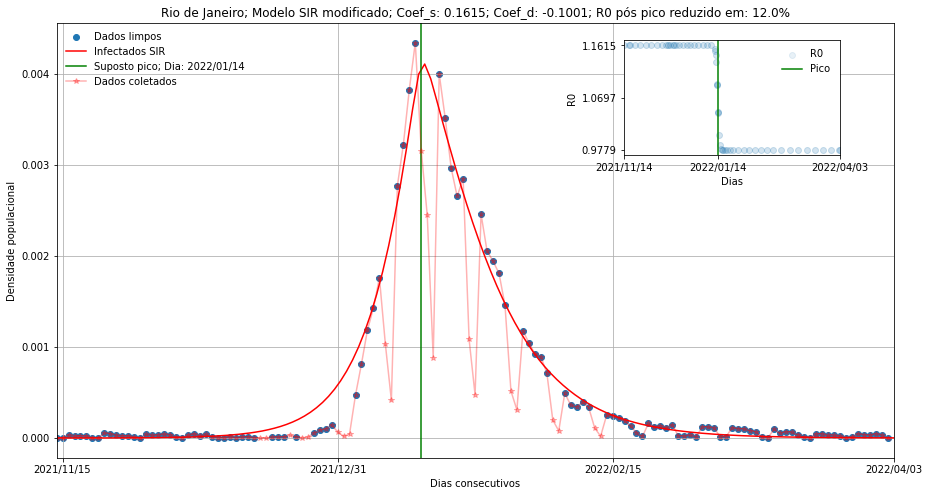

In [11]:
# Rio de Janeiro

# Entrada
url0 = 'https://raw.githubusercontent.com/isplay/projeto_propagacao_epidemias/main/csv_dados_limpos/Rio_de_Janeiro_cidade_limpos.csv'
dados0 = pd.read_csv(url0)
dados_limpos = True
url1 = 'https://raw.githubusercontent.com/isplay/projeto_propagacao_epidemias/main/csv/Rio_de_Janeiro_cidade.csv'
dados1 = pd.read_csv(url1)

# Região
população = 6775561
nome_cidade = 'Rio de Janeiro'

# Intervalo do maior gráfico
oeste = 595
leste = 780

# Intervalo do menor gráfico
x_esq = 640
x_dir = 780


#SIR
def sir(t, y):
    s, i, r = y
    
    R0 = -A*np.tanh((t - t_pico)) + M
    
    dsdt = - R0 * s * i
    didt = R0 * s * i - i
    drdt = i
    list_R0.append(R0)
    list_t.append(t)
    
    return dsdt, didt, drdt

# Coeficientes coletados
coef_s = 0.1615219031945897
coef_d = -0.10009838636511394

# Função R0(t)

R0_s = coef_s + 1
R = 0.88
R0_d = R*1/(1-(-coef_d))
M = (R0_s+R0_d)/2
A = R0_s - M


list_R0 = [] 
list_t = []

# Condições iniciais
t0, t = oeste, leste
t_pico =  701
i0 = 1e-10
r0 = 0
s0 = 1 - i0 - r0

# Simulando o Modelo SIR
resolucao_curva = np.linspace(t0,t,leste-oeste)
res = solve_ivp(sir, (t0, t), y0=[s0, i0, r0], t_eval=resolucao_curva, method='LSODA')

# Plot
grafico(oeste, leste, dados0, dados1, t_pico, list_t, list_R0, R0_s, R0_d, x_esq, x_dir, coef_s, coef_d)


# Outros coeficientes que funcionaram:
#coef_s = 0.207
#coef_d = -0.025

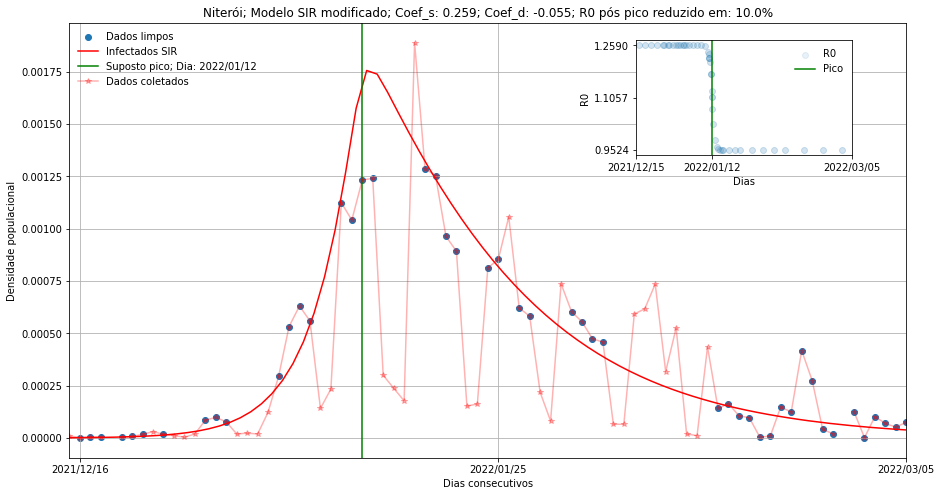

In [4]:
# Niterói

# Entrada
url0 = 'https://raw.githubusercontent.com/isplay/projeto_propagacao_epidemias/main/csv_dados_limpos/Niter%C3%B3i_casos_limpos.csv'
dados0 = pd.read_csv(url0)
dados_limpos = True
url1 = 'https://raw.githubusercontent.com/isplay/projeto_propagacao_epidemias/main/csv/Niter%C3%B3i_casos.csv'
dados1 = pd.read_csv(url1)

# Região
população = 516981
nome_cidade = 'Niterói'

# Intervalo de dias total
oeste = 602
leste = 760

# Intervalo no eixo horizontal no gráfico
x_esq = 640
x_dir = 720


#SIR
def sir(t, y):
    s, i, r = y
    
    # R0(t)
    R0 = -A*np.tanh((t - t_pico)) + M
    
    dsdt = - R0 * s * i
    didt = R0 * s * i - i
    drdt = i
    list_R0.append(R0)
    list_t.append(t)
    return dsdt, didt, drdt

# Coeficientes coletados
coef_s = 0.259017367293413
coef_d = -0.05500514489361079

# Função R0(t)
R0_s = coef_s + 1
R = 0.90
R0_d = R*1/(1-(-coef_d))
M = (R0_s+R0_d)/2
A = R0_s - M
list_R0 = [] 
list_t = []

# Condições iniciais
t0, t = oeste, leste
t_pico =  668
i0 = 1e-10
r0 = 0
s0 = 1 - i0 - r0

# Simulando o Modelo SIR
resolucao_curva = np.linspace(t0,t,leste-oeste)
res = solve_ivp(sir, (t0, t), y0=[s0, i0, r0], t_eval=resolucao_curva, method='LSODA')

# Plot
grafico(oeste, leste, dados0, dados1, t_pico, list_t, list_R0, R0_s, R0_d, x_esq, x_dir, coef_s, coef_d)

#Niterói
#coef_s = 0.207
#coef_d = -0.042

# Rio de Janeiro
#coef_s = 0.207
#coef_d = -0.025

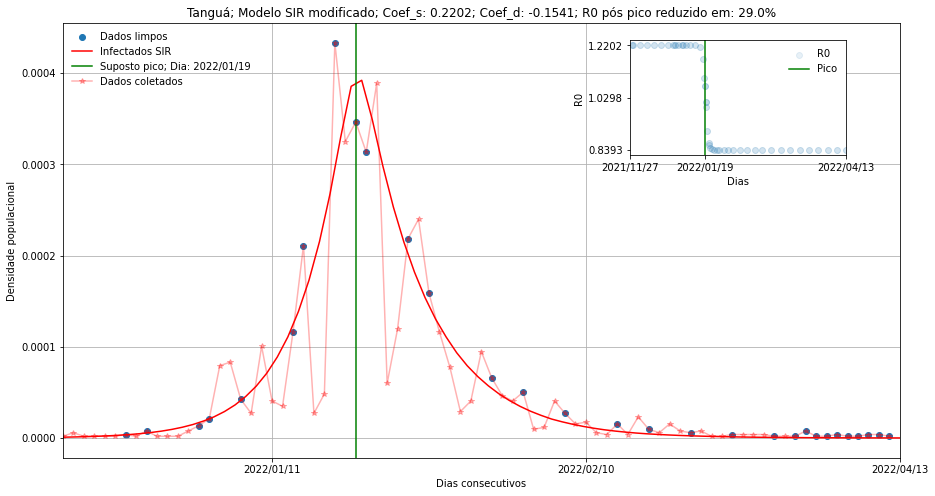

In [4]:
# Tanguá

# Entrada
url0 = 'https://raw.githubusercontent.com/isplay/projeto_propagacao_epidemias/main/csv_dados_limpos/Tangu%C3%A1_casos_limpos.csv'
dados0 = pd.read_csv(url0)
dados_limpos = True
url1 = 'https://raw.githubusercontent.com/isplay/projeto_propagacao_epidemias/main/csv/Tangu%C3%A1_casos.csv'
dados1 = pd.read_csv(url1)

# Região
população = 516981
nome_cidade = 'Tanguá'

# Intervalo de dias total
oeste = 511
leste = 630

# Intervalo no eixo horizontal no gráfico
x_esq = 550
x_dir = 630


#SIR
def sir(t, y):
    s, i, r = y
    
    # R0(t)
    R0 = -A*np.tanh((t - t_pico)) + M
    
    dsdt = - R0 * s * i
    didt = R0 * s * i - i
    drdt = i
    list_R0.append(R0)
    list_t.append(t)
    return dsdt, didt, drdt

# Coeficientes coletados
coef_s = 0.22022057838460374
coef_d = -0.15410180905931598

# Função R0(t)
R0_s = coef_s + 1
R = 0.71
R0_d = R*1/(1-(-coef_d))
M = (R0_s+R0_d)/2
A = R0_s - M
list_R0 = [] 
list_t = []

# Condições iniciais
t0, t = oeste, leste
t_pico =  578
i0 = 1e-10
r0 = 0
s0 = 1 - i0 - r0

# Simulando o Modelo SIR
resolucao_curva = np.linspace(t0,t,leste-oeste)
res = solve_ivp(sir, (t0, t), y0=[s0, i0, r0], t_eval=resolucao_curva, method='LSODA')

# Plot
grafico(oeste, leste, dados0, dados1, t_pico, list_t, list_R0, R0_s, R0_d, x_esq, x_dir, coef_s, coef_d)

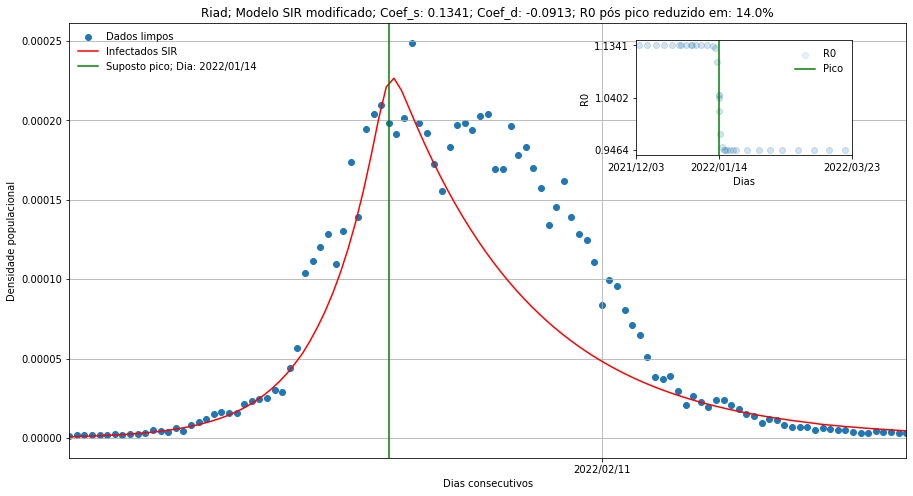

In [304]:
# Radid

# Entrada
url0 = 'https://raw.githubusercontent.com/isplay/projeto_propagacao_epidemias/main/csv/Riad_casos.csv'
dados0 = pd.read_csv(url0)
dados_limpos = False
#url1 = 0
#dados1 = pd.read_csv(url1)

# Região
população = 7676654
nome_cidade = 'Riad'

# Intervalo de dias total
oeste = 400
leste = 800

# Intervalo no eixo horizontal no gráfico
x_esq = 630
x_dir = 740

#SIR
def sir(t, y):
    s, i, r = y
    
    # R0(t)
    R0 = -A*np.tanh((t - t_pico)) + M
    
    dsdt = - R0 * s * i
    didt = R0 * s * i - i
    drdt = i
    list_R0.append(R0)
    list_t.append(t)
    return dsdt, didt, drdt

# Coeficientes coletados
coef_s = 0.13409708734141615
coef_d = -0.09126776222575132

# Função R0(t)
R0_s = coef_s + 1
R = 0.86
R0_d = R*1/(1-(-coef_d))
M = (R0_s+R0_d)/2
A = R0_s - M
list_R0 = [] 
list_t = []

# Condições iniciais
t0, t = oeste, leste
t_pico =  672
i0 = 1e-19
r0 = 0
s0 = 1 - i0 - r0

# Simulando o Modelo SIR
resolucao_curva = np.linspace(t0,t,leste-oeste)
res = solve_ivp(sir, (t0, t), y0=[s0, i0, r0], t_eval=resolucao_curva, method='LSODA')

# Plot
grafico(oeste, leste, dados0, dados1, t_pico, list_t, list_R0, R0_s, R0_d, x_esq, x_dir, coef_s, coef_d)

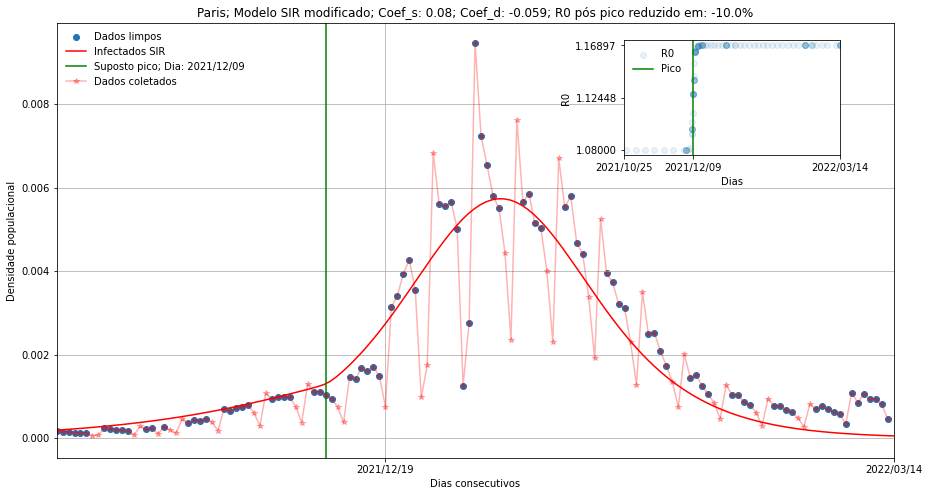

In [38]:
# Paris

# Entrada
url0 = 'https://raw.githubusercontent.com/isplay/projeto_propagacao_epidemias/main/csv_dados_limpos/Paris_casos_limpos.csv'
dados0 = pd.read_csv(url0)
dados_limpos = True
url1 = 'https://raw.githubusercontent.com/isplay/projeto_propagacao_epidemias/main/csv/Paris_casos.csv'
dados1 = pd.read_csv(url1)

# Região
população = 2148271
nome_cidade = 'Paris'

# Intervalo de dias total
oeste = 330
leste = 670

# Intervalo no eixo horizontal no gráfico
x_esq = 530
x_dir = 670


#SIR
def sir(t, y):
    s, i, e, r = y
    
    R0 = -A*np.tanh((t - t_pico)) + M
    
    dsdt = - R0 * s * i
    dedt = R0 * s * i - a*e
    didt = a*e - i
    drdt = i
    list_R0.append(R0)
    list_t.append(t)
    return dsdt, didt, dedt, drdt

# Coeficientes coletados
coef_s = 0.08
coef_d = -0.059

# Função R0(t)
R0_s = coef_s + 1
R = 1.10
R0_d = R*1/(1-(-coef_d))
M = (R0_s+R0_d)/2
A = R0_s - M
list_R0 = []
list_t = []

# Condições iniciais
a = 2
t0, t = oeste, leste
t_pico = 575
i0 = 0
r0 = 0
e0 = 1e-10
s0 = 1 - i0 - r0 - e0

# Simulando o Modelo SIR
resolucao_curva = np.linspace(t0,t,leste-oeste)
res = solve_ivp(sir, (t0, t), y0=[s0, i0, e0, r0], t_eval=resolucao_curva, method='LSODA')

# Plot
grafico(oeste, leste, dados0, dados1, t_pico, list_t, list_R0, R0_s, R0_d, x_esq, x_dir, coef_s, coef_d)